# 2. Интерполяция кривой

Сгенерируйте от 5 до 20 точек со случайными разными координатами (x, y), расположите их на координатной плоскости

1. С помощью библиотеки scipy примените один из её [алгоритмов интерполяции](https://docs.scipy.org/doc/scipy/reference/interpolate.html) к сгенерированным данным
1. Изучите математический подход метод выбранного алгоритма интерполяции в scipy. Найдите и продемонстрируйте при сдаче реализацию метода в исходном коде библиотеки scipy. Найти можно в [github репозитории проекта](https://github.com/scipy/scipy)
1. Выберите среди методов интерполяции в scipy любой другой метод интерполяции (кроме линейной интерполяций). Реализуйте выбранный метод без использования сторонних библиотек. Разрешается использовать numpy для упрощения математичеких вычислений
1. Визуализируйте кривую интерполяции библиотечного и вашего алгоритмов с помощью  matplotlib. Сравните качество интерполяции своего и библиотечного методов, объясните разницу в качестве

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from numpy.polynomial.polynomial import Polynomial
from scipy.interpolate import CubicSpline, lagrange

In [14]:
def get_data():
    df = pd.DataFrame(np.random.randint(0, 100, size=(7, 2)), columns=list('XY'))
    df = df.sort_values(by=['X'])
    x = df.X.tolist()
    y = df.Y.tolist()
    if len(x) == len(set(x)):
        return x, y
    else:
        return get_data()

In [18]:
def create_basic_polynomial(x_values, i):
    def basic_polynomial(x):
        divider = 1
        result = 1
        for j in range(len(x_values)):
            if j != i:
                result *= (x - x_values[j])
                divider *= (x_values[i] - x_values[j])
        return result / divider

    return basic_polynomial


def create_Lagrange_polynomial(x_values, y_values):
    basic_polynomials = []
    for i in range(len(x_values)):
        basic_polynomials.append(create_basic_polynomial(x_values, i))

    def lagrange_polynomial(x):
        result = 0
        for i in range(len(y_values)):
            result += y_values[i] * basic_polynomials[i](x)
        return result

    return lagrange_polynomial

In [19]:
x, y = get_data()
lag_pol = create_Lagrange_polynomial(x, y)

f = CubicSpline(x, y)
x_new = np.linspace(x[0], x[-1], 100)
y_new = f(x_new)

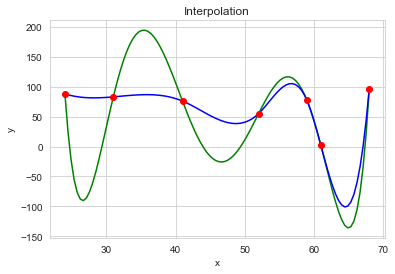

In [21]:
poly = lagrange(x, y)
plt.title('Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x_new, Polynomial(poly.coef[::-1])(x_new), 'g')
# plt.plot(x_new, list(map(lag_pol, x_new)), 'r')
plt.plot(x_new, y_new, 'b')
plt.plot(x, y, 'ro')
plt.show()